<a href="https://colab.research.google.com/github/Namratharao22/diabetes-prediction/blob/main/Diabetes_data_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importing Required Libraries and Set Random Seed

In [ ]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score,precision_recall_curve,average_precision_score,roc_curve,roc_auc_score
)
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Setting the random seed for reproducibility
np.random.seed(4277)

## 2. Data Preprocessing

In [ ]:
# Load dataset
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# Gaining insights into the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20068 entries, 0 to 20067
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               20068 non-null  object 
 1   age                  20068 non-null  float64
 2   hypertension         20068 non-null  int64  
 3   heart_disease        20068 non-null  int64  
 4   smoking_history      20068 non-null  object 
 5   bmi                  20068 non-null  float64
 6   HbA1c_level          20068 non-null  float64
 7   blood_glucose_level  20068 non-null  int64  
 8   diabetes             20068 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 1.4+ MB


In [ ]:
# Checking the number of rows and columns
rows_col = df.shape
print("Total number of Rows in the dataset : {}".format(rows_col[0]))
print("Total number of columns in the dataset : {}".format(rows_col[1]))

Total number of Rows in the dataset : 20068
Total number of columns in the dataset : 9


In [ ]:
# Delete duplicated row
df.drop_duplicates()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
20063,Male,22.0,0,0,never,22.12,5.0,155,0
20064,Female,19.0,0,0,never,21.14,3.5,158,0
20065,Male,22.0,0,0,No Info,26.48,6.6,100,0
20066,Female,56.0,0,0,not current,19.10,5.0,159,0


In [ ]:
# Check for missing values
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
# Drop rows with more than 50% missing data
df.dropna(thresh=len(df.columns) * 0.5, inplace=True)

In [ ]:
# Drop columns with more than 70% missing data
df = df.loc[:, df.isnull().mean() < 0.7]

In [ ]:
## displaying the structure of the dataset

print(str(df))

       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
20063    Male  22.0             0              0           never  22.12   
20064  Female  19.0             0              0           never  21.14   
20065    Male  22.0             0              0         No Info  26.48   
20066  Female  56.0             0              0     not current  19.10   
20067    Male  20.0             0              0            ever  18.38   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140        

#### Converting gender variable to Binary

In [ ]:
# Define a function to convert 'Gender' to binary
def binary_gender(gender):
    return 1 if gender.strip() == 'Male' else 0

# Apply the function to the 'Status' column
df['gender'] = df['gender'].apply(binary_gender)

# Display the updated DataFrame or unique values to verify the change
print(df['gender'].unique())

[0 1]


#### Converting smoking_history variable to numeric

In [ ]:
# Define a function to convert 'Gender' to binary
def numeric_smoking_history(smoking_history):
    if smoking_history.strip() == 'never':
        return 0
    elif smoking_history == 'No Info':
        return 1
    elif smoking_history == 'current':
        return 2
    elif smoking_history == 'former':
        return 3
    elif smoking_history == 'ever':
        return 4
    else:
        return 5



# Apply the function to the 'Status' column
df['smoking_history'] = df['smoking_history'].apply(numeric_smoking_history)

# Display the updated DataFrame or unique values to verify the change
print(df['smoking_history'].unique())

[0 1 2 3 4 5]


## 3. Model Building

In [ ]:
X = df.drop(columns=['diabetes'])

In [ ]:
y = df['diabetes']

In [ ]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Standardizing the dataset after splitting to ensure that the features are on a similar scale and to avoid data leakage.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 3.1 Support Vector Machine

In [ ]:
# Defining the parameter grids
param_grid_svc = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

In [ ]:
# Initializing the model
svm = SVC(probability=True)

In [ ]:
# Perform Grid Search for the model
grid_search_svc = GridSearchCV(svm, param_grid_svc, cv=5, verbose=1,scoring='recall')

In [ ]:
# Fitting the model
grid_search_svc.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='recall', verbose=1)

In [ ]:
# Printing the best parameters for the model
print("Best SVC parameters:", grid_search_svc.best_params_)

Best SVC parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
# print the best score
print(grid_search_svc.best_score_)

0.6004795429037852


In [ ]:
# Retraining the model with the best parameters
svc_best = grid_search_svc.best_estimator_

### 3.2 Decision Tree

In [ ]:
# create a dictionary with the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(3, 25, 2),
    'min_samples_split': range(4, 11, 2),
    'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9]
}

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
# create a grid search object
grid_search_dt = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='f1')

In [ ]:
# Fitting the model
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 616 candidates, totalling 3080 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 25, 2),
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': range(4, 11, 2)},
             scoring='f1', verbose=1)

In [ ]:
# Printing the best parameters for the model
print("Best Decision Tree parameters:", grid_search_dt.best_params_)

Best Decision Tree parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 4}


In [ ]:
# print the best score
print(grid_search_dt.best_score_)

0.8021042145058426


In [ ]:
# Retraining the model with the best parameters
dt_best = grid_search_dt.best_estimator_

## 4. Evaluation of Models

In [ ]:
# Predict on the test set
y_pred_dt = dt_best.predict(X_test)
y_pred_svm = svc_best.predict(X_test)

In [ ]:
# Calculate accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"SVM Accuracy: {svm_accuracy}")


Decision Tree Accuracy: 0.972263743564192
SVM Accuracy: 0.9619664507556884


## 4.1 Confusion Matrices

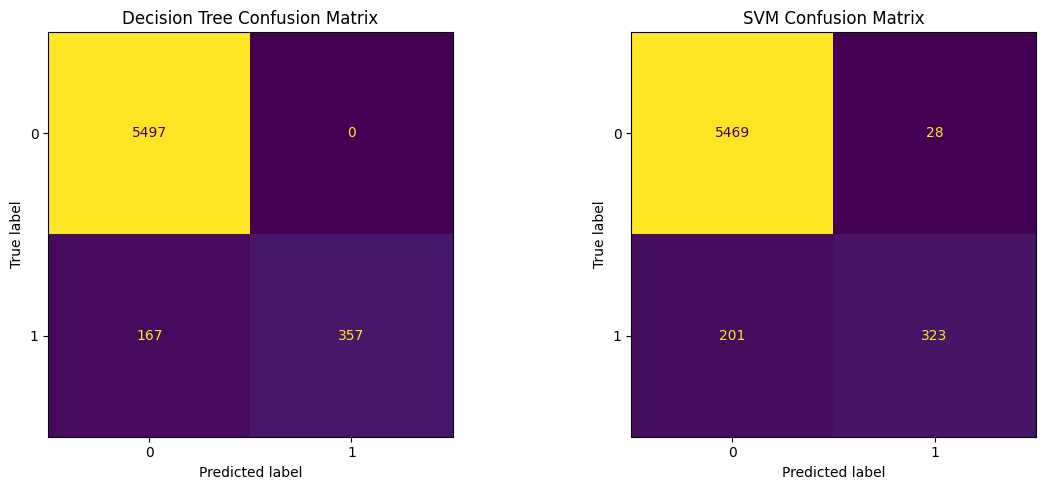

In [ ]:

# Create a subplot with 1 row and 2 columns for side-by-side comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Decision Tree Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt)
disp_dt.plot(ax=ax[0], colorbar=False)  # Plot on the first subplot (ax[0])
ax[0].set_title("Decision Tree Confusion Matrix")

# SVM Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm)
disp_svm.plot(ax=ax[1], colorbar=False)  # Plot on the second subplot (ax[1])
ax[1].set_title("SVM Confusion Matrix")


# Adjust layout
plt.tight_layout()
plt.show()




*Interpretation of Decision Tree Confusion Matrix*:


There were a total of 357 positive and 5664 negative predictions.Out of which all the postive predictions .And 5497 negative predictions were true and 167 were false.

  **False Positives**: 0

     In 0 cases Model predicted that a patient is diagonised with diabetes even when he is not.

  **False Negatives**: 167

     In 167 cases Model predicted that a patient is perfectly alright even though he has diabetes.


*Interpretation of SVM Confusion Matrix*:


There were a total of 351 positive and 5670 negative predictions.Out of which 323 postive predictions were true and 28 were false.And 201 negative predictions were true and 5469 were false.

**False Positives**: 28

    In 6 cases Model predicted that a patient is diagonised with diabetes even when he is not.

**False Negatives**: 201

     In 3 cases Model predicted that a patient is perfectly alright even though he has diabetes.

### 4.2 Performance Metrics

**• Precision**: Precision measures the proportion of patients who were correctly predicted to respond out of all those predicted to respond. While precision is crucial when false positives are costly, in this case, we are more concerned with false negatives.

                                     True Positives (TP)
       Precision =    ___________________________________________________
                           True Positives (TP)+ False Positives (FP)

        - A higher precision means  minimizing the chances of false alarms, avoiding unnecessary stress and additional testing for patients who don’t have diabetes.
        

**• Recall**: Recall, or sensitivity, measures the proportion of actual responders that were correctly identified by the model. In this context, high recall is critical because minimizing false negatives ensures that fewer potential customers are missed.

                                     True Positives (TP)
       Recall =    ___________________________________________________
                           True Positives (TP)+ False Negatives (FN)


        -  High recall is essential to identify most diabetic cases, minimizing missed diagnoses.
        

**• F1 Score**: The F1 score provides a balanced measure that combines precision and recall. It is particularly useful when both false positives and false negatives need to be considered. However, given the higher cost of false negatives in this campaign, the focus should remain on recall.

                                     Precision * Recall
       F1 Score =    ___________________________________________________
                                     Precision + Recall

        - Balances precision and recall, indicating reliable identification of diabetes with fewer false results.
                            

**• Accuracy**: Accuracy measures the overall correctness of the model’s predictions. However, it may be misleading in cases of imbalanced data (like this one), as a model could predict the majority class most of the time and still achieve high accuracy without necessarily minimizing false negatives.

                           True Positives (TP) + True Negatives (TN)
       Accuracy =    ___________________________________________________
                                     Total Predictions

        - Shows overall performance but can be misleading if there are many more non-diabetic cases, as it might overlook true positives..
        

In [ ]:
### Decision Tree Performance Metrics

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(f"Decision Tree Metrics:\n")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f} \n\n")


### SVM Performance Metrics

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"SVM Metrics:\n")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")

Decision Tree Metrics:

Accuracy: 0.9723
Precision: 1.0000
Recall: 0.6813
F1 Score: 0.8104 


SVM Metrics:

Accuracy: 0.9620
Precision: 0.9202
Recall: 0.6164
F1 Score: 0.7383


**1. Decision Tree Model:**

	• Accuracy (0.9723): This means the Decision Tree model correctly predicted the class in approximately 97.23% of cases. High accuracy usually suggests the model is generally good at predicting both classes.
	• Precision (1.0000): A precision of 1.0 indicates that every positive prediction the model made was correct (no false positives). However, this does not tell us about false negatives.
	• Recall (0.6813): This recall score (68.13%) suggests that the model is capturing about 68.13% of actual positive cases. A lower recall here indicates that some positive cases are not being detected by the model (false negatives).
	• F1 Score (0.8104): The F1 score is the harmonic mean of precision and recall, balancing the two. This score (81.04%) reflects a balance but suggests that while precision is perfect, recall is lower, so there is room for improvement in detecting all positive cases.

    Summary: The Decision Tree model has high precision but somewhat lower recall, meaning it avoids false positives effectively but might miss some true positives. This is indicated by a slightly lower F1 score than its precision. This model may be more conservative in making positive predictions.

**2. SVM Model:**

	• Accuracy (0.9620): The SVM model correctly predicted the class in about 96.20% of cases, slightly lower than the Decision Tree model.
	• Precision (0.9202): With a precision of 92.02%, the SVM model makes fewer false positive errors compared to models with lower precision, but not as strictly as the Decision Tree.
	• Recall (0.6164): The recall is 61.64%, which indicates that the model is capturing fewer positive cases than the Decision Tree model (more false negatives).
	• F1 Score (0.7383): The F1 score (73.83%) is lower than the Decision Tree, indicating a lower balance between precision and recall.

    Summary: The SVM model has lower precision, recall, and F1 score than the Decision Tree. It still has a high precision (92.02%) but is less effective at detecting all positive cases compared to the Decision Tree model.

**Overall Comparison**

	• Decision Tree: Better for applications where avoiding false positives is crucial, given its high precision. However, its recall is higher than SVM, so it also performs slightly better in detecting positive cases overall.
	• SVM: While it maintains a high precision, it has a lower recall and F1 score, which means it may miss more positive cases than the Decision Tree model.

**Conclusion:**
    For situations where missing positives has significant consequences, the Decision Tree would be preferable, as it provides a better balance with a higher recall and F1 score.